In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D,MaxPool2D,Dropout, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy,sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
import glob
import shutil
import random
from keras.models import Model
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
final_submit_id=test['Id']

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.index=data.pop('Id')
test.index=test.pop('Id')

In [6]:
temp=data['SalePrice']

<AxesSubplot: ylabel='Id'>

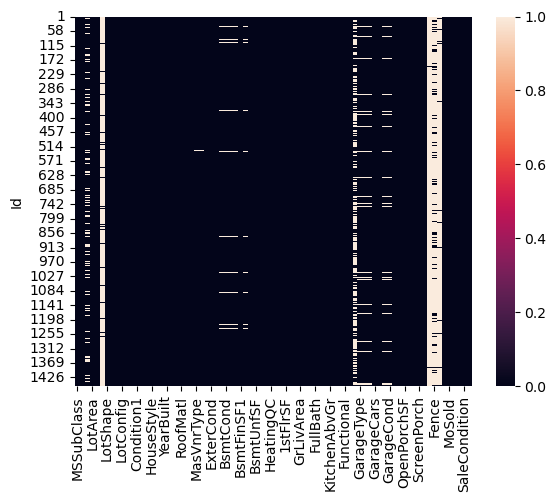

In [7]:
sns.heatmap(data.isnull())

1460 no of rows

In [8]:
# col=data.columns

In [9]:
# for c in col:
#     print(c,' ',data[c].isnull().sum())

In [10]:
y=data['SalePrice']
data=data.drop(['SalePrice'],axis=1)
data=data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)
test=test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)
col=data.columns

In [11]:
y=y.to_numpy()
y=y.reshape(len(y),1)

In [12]:
tt=y

In [13]:
obj=[]
num=[]
for c in col:
    if data[c].dtype=='float64':
        num.append(c)
    else:
        obj.append(c)

# for o in obj:
#     data[o]=data[o].fillna(" ")
#     test[o]=test[o].fillna(" ")

for o in obj:
    le=LabelEncoder()
    le.fit(data[o])
    temp1=le.transform(data[o])
    data[o]=temp1
    le=LabelEncoder()
    le.fit(test[o])
    temp2=le.transform(test[o])
    test[o]=temp2

for n in num:
    data[n]=data[n].fillna(data[n].mean())
    test[n]=test[n].fillna(test[n].mean())
sc=StandardScaler()
columns=data.columns
data[columns]=sc.fit_transform(data[columns])
test[columns]=sc.fit_transform(test[columns])
y=sc.fit_transform(y)

In [14]:
train_df=data
test_df=test

In [15]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [16]:
# y=tt
# print(y[0])
# y=y.reshape((y.shape[1],1))
# y=sc.fit_transform(y)

In [17]:
# y

In [18]:
data.shape

(1460, 74)

In [19]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.200350,-0.045532,-0.229372,-0.549214,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.279117,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,-1.599111,0.138777,0.313867,0.208502
2,-1.001421,-0.045532,0.451936,0.019617,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.744360,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,-0.489110,-0.614439,0.313867,0.208502
3,0.200350,-0.045532,-0.093110,0.698223,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.117741,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,0.990891,0.138777,0.313867,0.208502
4,0.440704,-0.045532,-0.456474,-0.010321,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,-0.243065,4.284008,-0.114517,-0.255029,-0.062051,-0.162018,-1.599111,-1.367655,0.313867,-3.426284
5,0.200350,-0.045532,0.633618,1.440032,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,0.717751,-0.352247,-0.114517,-0.255029,-0.062051,-0.162018,2.100892,0.138777,0.313867,0.208502


In [20]:
df_as_np=data.to_numpy()
Y=y
middle=df_as_np
X=middle.reshape((len(Y),middle.shape[1]))
test_data=test.to_numpy()
final_test=test_data.reshape((len(test_data),middle.shape[1]))
# Y=temp.to_numpy()

In [21]:
print(X.shape)
print(Y.shape)
print(final_test.shape)

(1460, 74)
(1460, 1)
(1459, 74)


In [22]:
q_80=int(len(Y)*0.8)
q_90=int(len(Y)*0.9)
X_train,y_train=X[:q_80],Y[:q_80]
X_val, y_val = X[q_80:q_90], Y[q_80:q_90]
X_test, y_test=X[q_90:], Y[q_90:]

In [23]:
sale_normalizer = Normalization(input_shape=(74,),axis=-1)
sale_normalizer.adapt(X_train)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model=Sequential([
    # sale_normalizer,
    # Dropout(0.2),
    layers.Dense(128,input_shape=(74,),activation='relu'),        ## '64' is the number of units(neurons) and is necessary for dense layers
    # Dropout(0.2),
    layers.Dense(256, activation='relu'),
    # Dropout(0.2),
    layers.Dense(256, activation='relu'),
    # Dropout(0.2),
    layers.Dense(256, activation='relu'),
    # Dropout(0.2),
    layers.Dense(1,activation='linear')
])

In [112]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [113]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=2)

Epoch 1/100
37/37 - 1s - loss: 0.3293 - mean_absolute_error: 0.3293 - val_loss: 0.2847 - val_mean_absolute_error: 0.2847 - 666ms/epoch - 18ms/step
Epoch 2/100
37/37 - 0s - loss: 0.2231 - mean_absolute_error: 0.2231 - val_loss: 0.2644 - val_mean_absolute_error: 0.2644 - 135ms/epoch - 4ms/step
Epoch 3/100
37/37 - 0s - loss: 0.1885 - mean_absolute_error: 0.1885 - val_loss: 0.2975 - val_mean_absolute_error: 0.2975 - 132ms/epoch - 4ms/step
Epoch 4/100
37/37 - 0s - loss: 0.1738 - mean_absolute_error: 0.1738 - val_loss: 0.2745 - val_mean_absolute_error: 0.2745 - 141ms/epoch - 4ms/step
Epoch 5/100
37/37 - 0s - loss: 0.1468 - mean_absolute_error: 0.1468 - val_loss: 0.2982 - val_mean_absolute_error: 0.2982 - 143ms/epoch - 4ms/step
Epoch 6/100
37/37 - 0s - loss: 0.1565 - mean_absolute_error: 0.1565 - val_loss: 0.2874 - val_mean_absolute_error: 0.2874 - 136ms/epoch - 4ms/step
Epoch 7/100
37/37 - 0s - loss: 0.1366 - mean_absolute_error: 0.1366 - val_loss: 0.2613 - val_mean_absolute_error: 0.2613 - 

In [114]:
t1=y_test
t1=t1.reshape(len(t1))
t2=model.predict(X_test).flatten()
t2=t2.reshape(len(t2))
print(t1.shape)
print(t2.shape)
sum=0
for i in range(146):
    sum+=abs(t1[i]-t2[i])
print(sum/146)

5/5 [==============================] - 0s 2ms/step
(146,)
(146,)
0.20734558475680614


5/5 [==============================] - 0s 2ms/step


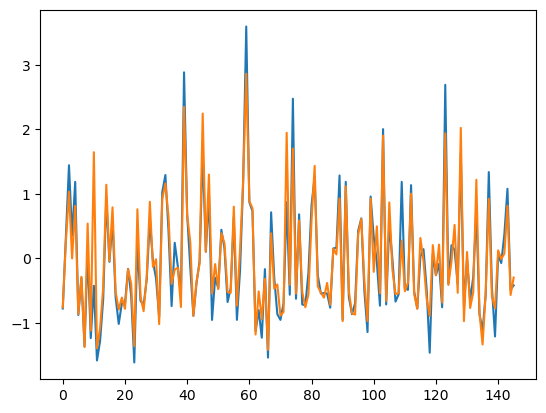

In [115]:
pred=model.predict(X_test).flatten()
plt.plot(y_test)
plt.plot(pred)

In [116]:
pred=model.predict(final_test)

46/46 [==============================] - 0s 2ms/step


In [117]:
pred.shape

(1459, 1)

In [118]:
pred=pred.reshape(len(pred),1)
p=sc.inverse_transform(pred)

In [119]:
p

array([[114956.88],
       [155954.3 ],
       [189812.14],
       ...,
       [184417.8 ],
       [141084.88],
       [236738.95]], dtype=float32)

In [32]:
# final_submit_id=final_submit_id.to_numpy()
# final_submit_id=final_submit_id.reshape(len(final_submit_id))
# print(final_submit_id.shape)

In [120]:
y_train.shape

(1168, 1)

In [56]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# logreg=LogisticRegression(max_iter=1000)

# from sklearn.model_selection import train_test_split
# x=train_df
# y=temp
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

# logreg.fit(x_train,y_train)

In [57]:
# pred=logreg.predict(test_df)

In [36]:
# pred
# p=pred

In [121]:
p=p.reshape(len(p))
print(p.shape)

(1459,)


In [122]:
dict={'Id':final_submit_id,'SalePrice':p}
df=pd.DataFrame(dict)
df.head()

,Id,SalePrice
0,1461,114956.882812
1,1462,155954.296875
2,1463,189812.140625
3,1464,191394.875000
4,1465,180777.703125


In [123]:
df.to_csv('submit.csv',index=False)